                                              ..-
    PyKat 1.2.81          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat

Using matplotlib backend: <object object at 0x000001D2D42E3400>


C:\Users\ibaldoni\AppData\Local\Temp\ipykernel_13316\775622631.py:29: UserWarning: parseKatCode depreciated, use parse.
  basekat.parseKatCode(basecode)
C:\Users\ibaldoni\AppData\Local\Temp\ipykernel_13316\775622631.py:43: UserWarning: parseKatCode depreciated, use parse.
  kat2.parseKatCode(code) # Parsing the FINESSE-code


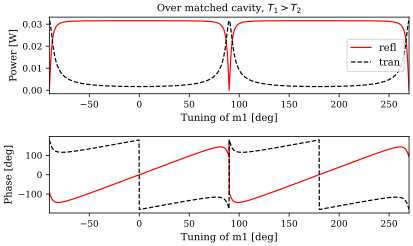

In [1]:
import numpy as np                         # Importing numpy
import matplotlib                          # For plotting
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib auto
# Initialises the PyKat plotting tool. Change dpi value 
# to change figure sizes on your screen
pykat.init_pykat_plotting(dpi=90)
          
basekat=finesse.kat() # initialising Finesse
basekat.verbose = False

# Finesse-code
basecode = """
l laser 0.001 0 n0   # Laser (Power = 1 mW, wavelength offset = 0)
s s1 0.125 n0 nc1    # Space (Length = 0.125 m)

## The cavity ##
m m1 0.995 0.005 0 nc1 nc2  # Mirror  (R = 0.999, T = 0.001, phi = 0)
s sL 0.125 nc2 nc3       # Space (Length =  km)
m m2 0.995 0.005 90 nc3 nc4  # Mirror  (R = 0.8, T = 0.2, phi = 90)
"""

# Parsing the FINESSE-code
basekat.parseKatCode(basecode) 

kat2 = deepcopy(basekat)
code = """
## Detectors ##

# Amplitude detectors
ad refl 0 nc1         # Reflected field
ad tran 0 nc4         # Transmitted field

## Simulation instructions ##
xaxis m1 phi lin -90 270 2000   # Varying phase of end mirror
yaxis abs:deg                   # Returning complex values of detector outputs
"""
kat2.parseKatCode(code) # Parsing the FINESSE-code

R1 =0.9
R2 =0.9 

T1 = 1-R1
T2 = 1-R2
kat2.m1.T = T1
kat2.m1.R = R1
kat2.m2.T = T2
kat2.m2.R = R2
out2a = kat2.run()


fig2a = out2a.plot(ylabel = 'Power [W]', 
                   xlabel = 'Tuning of m1 [deg]',
                   x2label = 'Tuning of m1 [deg]',
                   title = 'Over matched cavity, $T_1>T_2$',
                   styles={'circ':'b-','refl':'r-','tran':'k--'})

C:\Users\ibaldoni\AppData\Local\Temp\ipykernel_8784\1717934067.py:36: UserWarning: parseKatCode depreciated, use parse.
  basekat.parseKatCode(basecode)
C:\Users\ibaldoni\AppData\Local\Temp\ipykernel_8784\1717934067.py:63: UserWarning: parseKatCode depreciated, use parse.
  kat1.parseKatCode(code) # Parsing the FINESSE-code


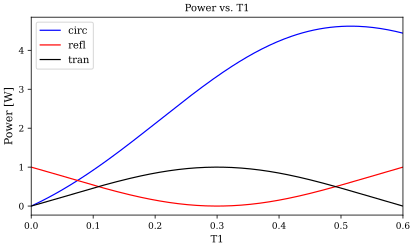

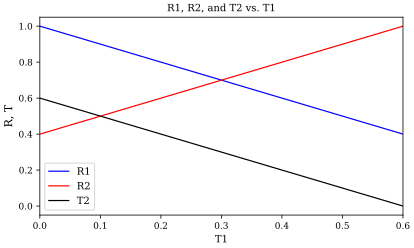

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 28 16:46:36 2021

@author: esavelyev
"""

import numpy as np                         # Importing numpy
import matplotlib                          # For plotting
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change dpi value 
# to change figure sizes on your screen
pykat.init_pykat_plotting(dpi=90)
          
basekat=finesse.kat() # initialising Finesse
basekat.verbose = False

# Finesse-code
basecode = """
l laser 1 0 n0   # Laser (Power = 1 W, wavelength offset = 0)
s s1 1 n0 nc1    # Space (Length = 1 m)

## The cavity ##
m m1 0.7 0.3 0 nc1 nc2  # Mirror  (R = 0.7, T = 0.3, phi = 0)
s sL 4000 nc2 nc3       # Space (Length = 4 km)
m m2 0.8 0.2 0 nc3 nc4  # Mirror  (R = 0.8, T = 0.2, phi = 0)
"""

# Parsing the FINESSE-code
basekat.parseKatCode(basecode) 

# Copying basekat
kat1 = deepcopy(basekat)

# Adding detectors and simulation instructions
code = """
## Detectors ##
pd refl nc1        # Photo diode measuring reflected DC power 
pd circ nc2        # Photo diode measuring circulating DC power
pd tran nc4        # Photo diode measuring transmitted DC power

## Simulation instructions ##
xaxis m1 T lin 0 0.6 200   # Varying transmittance of input mirror m1.
yaxis abs                  # Plotting the amplitude of the detector measurements. 

## Functions computing reflectance and transmittance ##
func R1 = 1-$x1             # Reflectance of m1 (lossless)
func T2 = 0.6 - $x1         # Transmittance of m2 (T1 + T2 = 0.6)
func R2 = 1-$T2             # Reflectance of m2

## Setting values ## 
put m1 R $R1                # Setting reflectance of m1 to R1
put m2 T $T2                # Setting transmittance of m2 to T2
put m2 R $R2                # Setting reflectance of m2 to R2
"""

kat1.parseKatCode(code) # Parsing the FINESSE-code
out1 = kat1.run()       # Running the FINESSE-simulation, storing output in out1.

fig1a = out1.plot(detectors=['refl','circ','tran'], 
                  xlabel='T1', 
                  ylabel='Power [W]', 
                  title = 'Power vs. T1')

# Reflectances and transmittances
fig1b = out1.plot(detectors=['R1','R2','T2'], 
                  xlabel='T1', 
                  ylabel='R, T', title='R1, R2, and T2 vs. T1')